**Hello. In this notebook, I will explain the steps I have taken for the <mark>data processing</mark> and the reasoning behind them. I will also provide references that have helped me make decisions and choose these approaches. Thank you for taking the time to review the uploaded files and for providing this opportunity.**

In [1]:
#importing the required libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
from Utils.DataUtils.DataLoader import ECGDataLoader
import Utils.DataUtils.DataAnalysing as data_analysing
import Utils.DataUtils.DataProcessing as data_processing
import Utils.DataUtils.DataImputation as data_imputation
import Utils.DataUtils.FeatureEngineering as feature_engineering

In [2]:
#Loading the dataset

# Create an instance of ECGDataLoader
data_loader = ECGDataLoader("Dataset\mitbih_train.csv")

# Load the ECG dataset from the CSV file
data_loader.load_ecg_dataset_csv()

# Get the dataset
df = data_loader.get_dataset()

#Get the features and the labels seperately
features, labels = data_loader.split_x_y()

<mark>Data Analysis</mark>

<small> In the DataAnalyzing module, we have several functions that perform various types of analysis on the dataset. Each function provides specific information that guides our decision-making regarding data preprocessing. For example, if null values are found, we can apply appropriate imputation methods to fill in the missing data. Or by correlation analysis if we identify high correlation among certain features, we can consider applying feature extraction techniques to remove redundant or highly dependent features. This helps reduce dimensionality and can improve model performance.

Functions implemented in the DataAnalysing module includes:
1. check_null_values
2. visualize_feature_statistics
3. plot_class_distribution
4. plot_features_correlation
5. plot_density
6. plot_signals

These analysis functions play a crucial role in understanding the dataset and identifying potential preprocessing steps. By utilizing the information they provide, we can make informed decisions about the necessary data transformations. I have included some examples below: </small>

In [8]:
# Lets see some samples
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Check if there's any missing vallue
data_analysing.check_null_values(df)

No null values found in the CSV file.


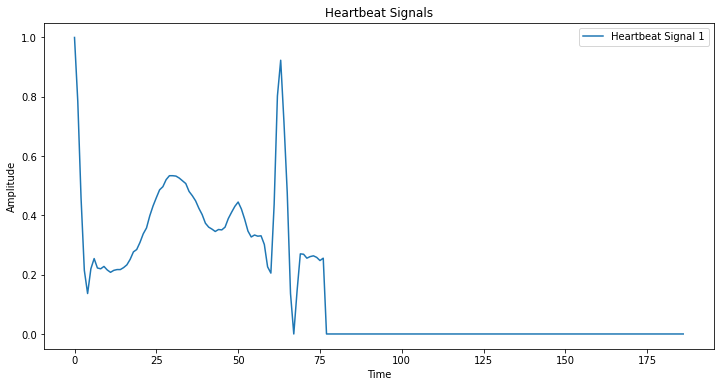

In [10]:
#Lets visualize one sample as a sample
signal_indice = 100
data_analysing.plot_signals([features.iloc[signal_indice, :].values])

In [11]:
# Checking some statistical information
data_analysing.visualize_feature_statistics(features)

,count,mean,std,min,25%,50%,75%,max
0,87554.0,0.890360,0.240909,0.0,0.921922,0.991342,1.000000,1.0
1,87554.0,0.758160,0.221813,0.0,0.682486,0.826013,0.910506,1.0
2,87554.0,0.423972,0.227305,0.0,0.250969,0.429472,0.578767,1.0
3,87554.0,0.219104,0.206878,0.0,0.048458,0.166000,0.341727,1.0
4,87554.0,0.201127,0.177058,0.0,0.082329,0.147878,0.258993,1.0
...,...,...,...,...,...,...,...,...
182,87554.0,0.003681,0.037193,0.0,0.000000,0.000000,0.000000,1.0
183,87554.0,0.003471,0.036255,0.0,0.000000,0.000000,0.000000,1.0
184,87554.0,0.003221,0.034789,0.0,0.000000,0.000000,0.000000,1.0
185,87554.0,0.002945,0.032865,0.0,0.000000,0.000000,0.000000,1.0


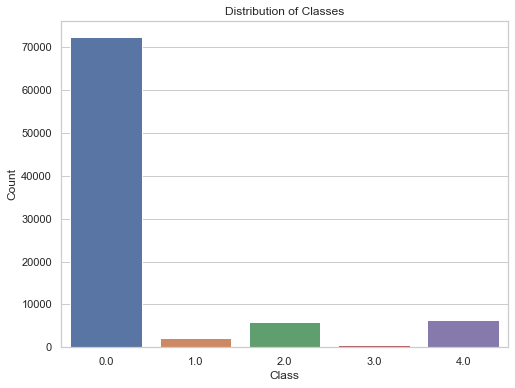

In [12]:
# Checking classes distributions
data_analysing.plot_class_distribution(labels)

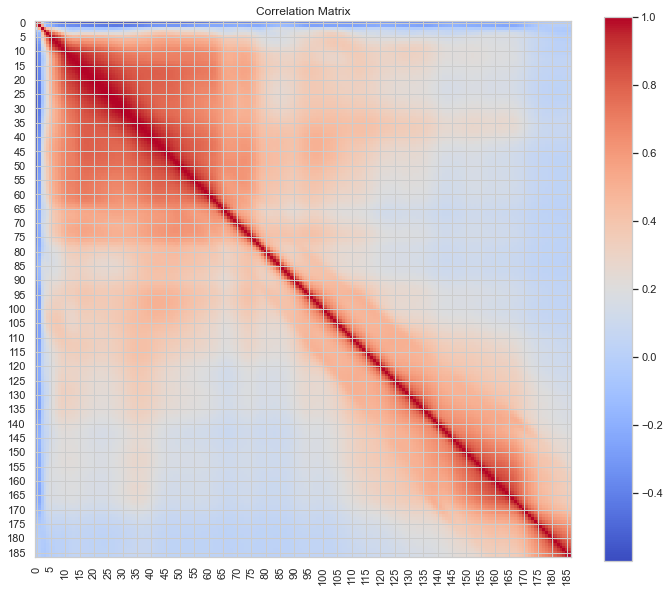

In [13]:
# Checking correlation among features
data_analysing.plot_features_correlation(features)

Features Density Plots:

<small> By looking at the density plot, you can gather several insights about the features:

Shape of Distribution: The shape of the density curve indicates the type of distribution the feature follows. It could be symmetric (bell-shaped like a normal distribution), skewed (leaning to one side), or multimodal (having multiple peaks).

Center of Distribution: The peak of the density curve represents the center or mode of the distribution. It gives an idea about the typical or most common values of the feature.

Spread of Values: The spread or variability of the feature values can be observed by looking at the width of the density curve. A wider curve indicates a larger spread, while a narrower curve suggests a smaller spread.

Outliers: Density plots can also reveal the presence of outliers. Outliers are data points that significantly deviate from the majority of the values and are represented by isolated peaks or spikes in the density plot.

Overlapping Distributions: When plotting multiple density curves together, you can observe if the distributions overlap or separate. Overlapping distributions indicate similar or correlated features, while separate distributions suggest distinct or independent features. </small>

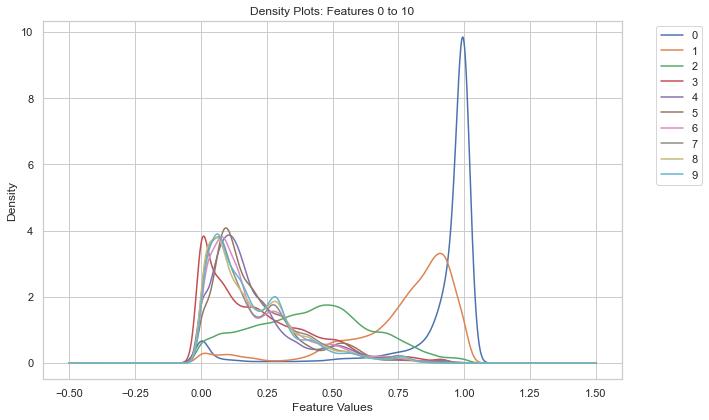

In [14]:
data_analysing.plot_density(features, start_index=0, end_index=10)

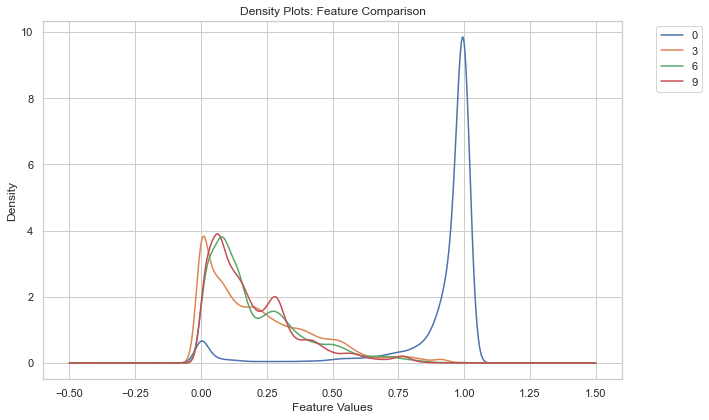

In [15]:
data_analysing.plot_density(features, feature_indices=[0,3,6,9])

<mark>Data Augmentation</mark>


**Reference:**

1. [CardioNet: An Efficient ECG Arrhythmia Classification System Using Transfer Learning](https://www.sciencedirect.com/science/article/pii/S2214579621000885)
2. [ECG Heartbeat Arrhythmia Classification Using Time-Series Augmented Signals and Deep Learning Approach](https://www.sciencedirect.com/science/article/pii/S1877050920310231)


<small>
In my project, I have implemented several augmentation methods for ECG signals based on the references I found in the literature. One of the papers I came across mentioned the successful use of squeeze, stretch, amplify, and augment methods, which resulted in a promising improvement of 99% in their experiments. By applying these transformations to every signal in the dataset, I aim to enhance the dataset's diversity and increase the variability of the samples.

The reasoning behind selecting these specific augmentation methods lies in their ability to introduce variations without compromising the fundamental nature, quality, or file size of the original signals. It is important to note that these transformations are lossless, ensuring that the important characteristics and information within the ECG signals are preserved.

They introduce valuable diversity and variability in the dataset, enabling the model to learn and generalize better. By artificially generating different versions of the same signal the model can adapt and handle variations it may encounter in real-world scenarios.

The augmentation techniques allow for an expanded dataset. By saving and appending the transformed signals to the original dataset, I am effectively increasing the sample size. This addresses the challenge of limited data, which can lead to over-fitting or under-fitting of the model. With a larger and more diverse dataset, the model can learn more effectively and avoid biases towards any particular class or pattern.
</small>



In [3]:
augmented_dataset = data_processing.augment_dataset(df, augmentation_factor=1)
print("The shape of the dataset before augmentation: {} | The shape of the dataset after augmentation: {}".format(df.shape, augmented_dataset.shape))

The shape of the dataset before augmentation: (87554, 188) | The shape of the dataset after augmentation: (102637, 188)


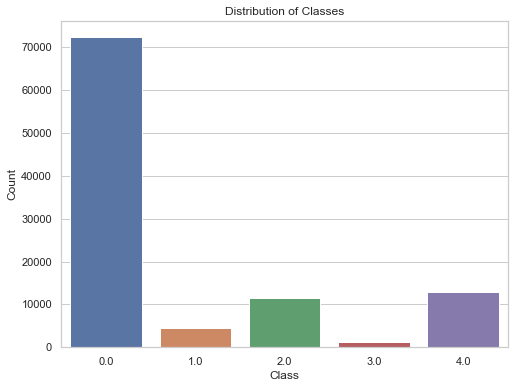

In [5]:
# Checking classes distributions again
data_analysing.plot_class_distribution(augmented_dataset.iloc[:, -1])

<mark>Denoising</mark>

Referenc: 
1. [An effective data enhancement method for classification of ECG arrhythmia](https://www.sciencedirect.com/science/article/pii/S0263224122011745)

<small>
In this paper, the focus is on arrhythmia classification using ECG signals. To enhance the accuracy and reliability of the classification model, a preprocessing step is performed to denoise the ECG signals. This denoising process aims to improve the signal-to-noise ratio, thereby enhancing the generalization ability and robustness of the model.

By reducing the noise present in the ECG signals, the preprocessing step helps to extract the underlying relevant information more effectively. This improved signal quality enables the classification model to better capture the distinctive features and patterns associated with different arrhythmias.</small>

c:\Users\Fatemeh\AppData\Local\Programs\Python\Python37\lib\site-packages\pywt\_multilevel.py:45: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


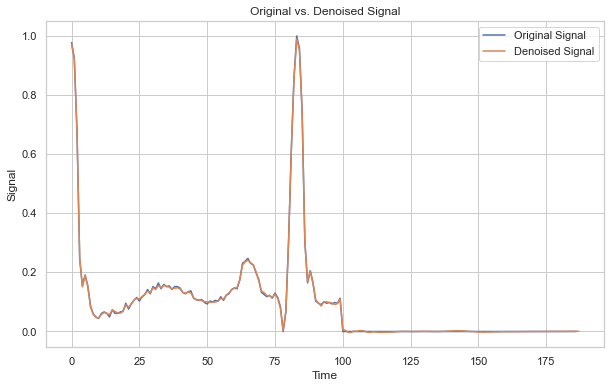

In [22]:
#Check the denoising function

sample_data = features.iloc[0, :].values
denoised_data = data_processing.apply_denoising(sample_data, level = 5)

plt.figure(figsize=(10, 6))
plt.plot(range(len(sample_data)), sample_data, label='Original Signal')
plt.plot(range(len(denoised_data)), denoised_data, label='Denoised Signal')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Original vs. Denoised Signal')
plt.legend()
plt.show()

<mark>Feature Engineering</mark>

References:
1. [ECG signal feature extraction trends in methods and applications](https://biomedical-engineering-online.biomedcentral.com/articles/10.1186/s12938-023-01075-1)
2. [A Critical Review of Feature Extraction Techniques for ECG Signal Analysis](https://link.springer.com/article/10.1007/s40031-021-00606-5)

<small>A practical feature extraction pipeline for physiological signals should generate robust features, compress data through dimensional reduction, and integrate seamlessly with ML models. Time and frequency domain features, while straightforward to extract, may not fully optimize the representation of underlying signals, particularly in the case of non-linear and non-stationary physiological signals like ECG. Therefore, time-frequency domain methods are preferred for ECG applications due to their ability to capture the complex characteristics of these signals.

1. The literature review confirms that the ***Wigner-Ville Distribution (WVD)*** exhibits excellent resolution along both the time and frequency axes of signals.


2. The ***Short-Time Fourier Transform (STFT)*** has been also mentioned as being effective in accurately detecting the modal frequencies of linear time-invariant systems and localizing them in time.

They can capture both the time and frequency information of the heartbeat signals. Heartbeat signals are non-stationary, meaning that their spectral content changes over time. Therefore, a joint time-frequency representation is needed to analyze them effectively.

WVD is capable of providing high-resolution features that can effectively distinguish different types of heartbeats, including normal, arrhythmia, or murmur. On the other hand, STFT is known for generating smooth and interpretable features that can mitigate cross-terms and noise interference. Both WVD and STFT contribute valuable features for heartbeat analysis and classification.

Other methods implemented for general feature selection techniques:
1. recursive_feature_elimination
2. correlation_analysis

</small>


In [24]:
new_features, mask = feature_engineering.recursive_feature_elimination(features, labels, k = 20)
print("Number of features before: {} | Number of features after: {}".format(new_features.shape, new_features.shape))

Number of features before: (87554, 20) | Number of features after: (87554, 20)


<mark>Data Imputation</mark>

Reference:
1. [Performance Comparison of Imputation Methods for Heart Disease Prediction](https://link.springer.com/chapter/10.1007/978-3-030-96569-3_11)

<small>

Missing data can affect the model's performance in various ways, such as decreasing accuracy, introducing bias, distorting relationships, increasing uncertainty, and causing overfitting. To handle missing data, different techniques can be used, such as discarding samples or imputing values. The choice of technique depends on the context and the pattern of missingness. Missing data should be handled carefully to avoid compromising the model's predictions.

According to the reference, mean, median, KNN, and iterative imputation methods were compared for a heart disease dataset with missing values ranging from 10% to 60%. The results showed that iterative imputation performed the best in terms of accuracy and F1-score. Mean and median imputation performed poorly, especially when the missing percentage was high

Different method has been implemented including:

1. Iterative
2. Mean
3. Forward
4. Backward

Forward or backward method is a type of imputation technique that uses the temporal order of the data to fill in the missing values. Forward method imputes the missing values by using the previous observed values, while backward method imputes the missing values by using the subsequent observed values. For example, if the ECG signal at time t is missing, forward method will use the ECG signal at time t-1 to impute it, while backward method will use the ECG signal at time t+1 to impute it.

Forward or backward method can be useful for heartbeat ECG dataset if the missing values are not too frequent and the ECG signal is relatively smooth and stable over time. However, if the missing values are frequent or the ECG signal is noisy or irregular, forward or backward method may not be able to capture the true variation and dynamics of the heartbeat.

In such cases, more sophisticated methods that use statistical models or machine learning techniques may be more appropriate.

5. Interpolation
6. Model based

In [25]:
# Create a DataFrame with missing values
dataframe = pd.DataFrame({'A': [1, 2, None, 4, 5],
                        'B': [None, 2, 3, None, 5],
                        'C': [1, 2, 3, 4, 5]})

expected_result = pd.DataFrame({'A': [1, 2, 3, 4, 5],
                            'B': [1, 2, 3, 4, 5],
                            'C': [1, 2, 3, 4, 5]})


# Call the function being tested
imputed_dataframe = data_imputation.impute_missing_values(dataframe, method='mean')

In [26]:
imputed_dataframe

,A,B,C
0,1.0,3.333333,1
1,2.0,2.000000,2
2,3.0,3.000000,3
3,4.0,3.333333,4
4,5.0,5.000000,5
